In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats # 假设检验

In [2]:
#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

## bank client data|名词变量对照解释

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
|1| age|| numeric||
 |2|job|type of job| categorical| "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"|
   |3|marital|marital status |categorical| "married","divorced","single"; note| "divorced" means divorced or widowed|
   |4|education ||categorical| "unknown","secondary","primary","tertiary"|
   |5|default| has credit in default?|binary| "yes","no"|
   |6|balance| average yearly balance, in euros |numeric |
   |7|housing| has housing loan?| binary| "yes","no"|
   |8|loan| has personal loan?| binary| "yes","no"|


related with the last contact of the current campaign
   
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
   |9|contact| contact communication type |categorical| "unknown","telephone","cellular" |
  |10|day| last contact day of the month |numeric|
  |11|month| last contact month of year |categorical| "jan", "feb", "mar", ..., "nov", "dec"|
  |12|duration| last contact duration, in seconds |numeric|

other attributes

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |13|campaign| number of contacts performed during this campaign and for this client numeric, includes last contact|numeric|
  |14|pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric| -1 means client was not previously contacted|
  |15|previous| number of contacts performed before this campaign and for this client |numeric|
  |16|poutcome| outcome of the previous marketing campaign |categorical| "unknown","other","failure","success"|

  Output variable desired target
  
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |17|y|has the client subscribed a term deposit| binary| "yes","no"|

In [3]:
# 导入数据
df = pd.read_csv("bank-additional-full.csv", sep = ';') # 含测试集的全部数据
test = pd.read_csv("bank-additional.csv",sep = ';') # 测试集

# 查看数据大小
print("bank-full.csv:", df.shape,"\n")
print("测试集", test.shape,"\n")

bank-full.csv: (41188, 21) 

测试集 (4119, 21) 



In [4]:
# 缺失值
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


加上additional info,发现里面有day-of-week
说明在之前的模型里，加上这个变量是做得是对的

In [6]:
# 重命名一下后面的变量名
'''
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
'''

'\n# social and economic context attributes\n16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\n17 - cons.price.idx: consumer price index - monthly indicator (numeric)\n18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\n19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\n20 - nr.employed: number of employees - quarterly indicator (numeric)\n'

In [7]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 去掉测试集

In [8]:
df = df.append(test)
df.drop_duplicates(keep = False, inplace = True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# 预处理

## 类型变量

In [9]:
# 找到类型变量
categorical_variables = df.columns[df.dtypes == "object"]
print(categorical_variables)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [10]:
# 查看数据分布
for var in categorical_variables:
    print("【变量名%s:】"%var)
    print(df[var].value_counts(),"\n","-"*30)

【变量名job:】
admin.           9404
blue-collar      8368
technician       6045
services         3572
management       2600
retired          1550
entrepreneur     1308
self-employed    1262
housemaid         950
unemployed        903
student           793
unknown           291
Name: job, dtype: int64 
 ------------------------------
【变量名marital:】
married     22405
single      10408
divorced     4164
unknown        69
Name: marital, dtype: int64 
 ------------------------------
【变量名education:】
university.degree      10896
high.school             8588
basic.9y                5471
professional.course     4703
basic.4y                3747
basic.6y                2062
unknown                 1562
illiterate                17
Name: education, dtype: int64 
 ------------------------------
【变量名default:】
no         29252
unknown     7792
yes            2
Name: default, dtype: int64 
 ------------------------------
【变量名housing:】
yes        19392
no         16769
unknown      885
Name: housing, dtype

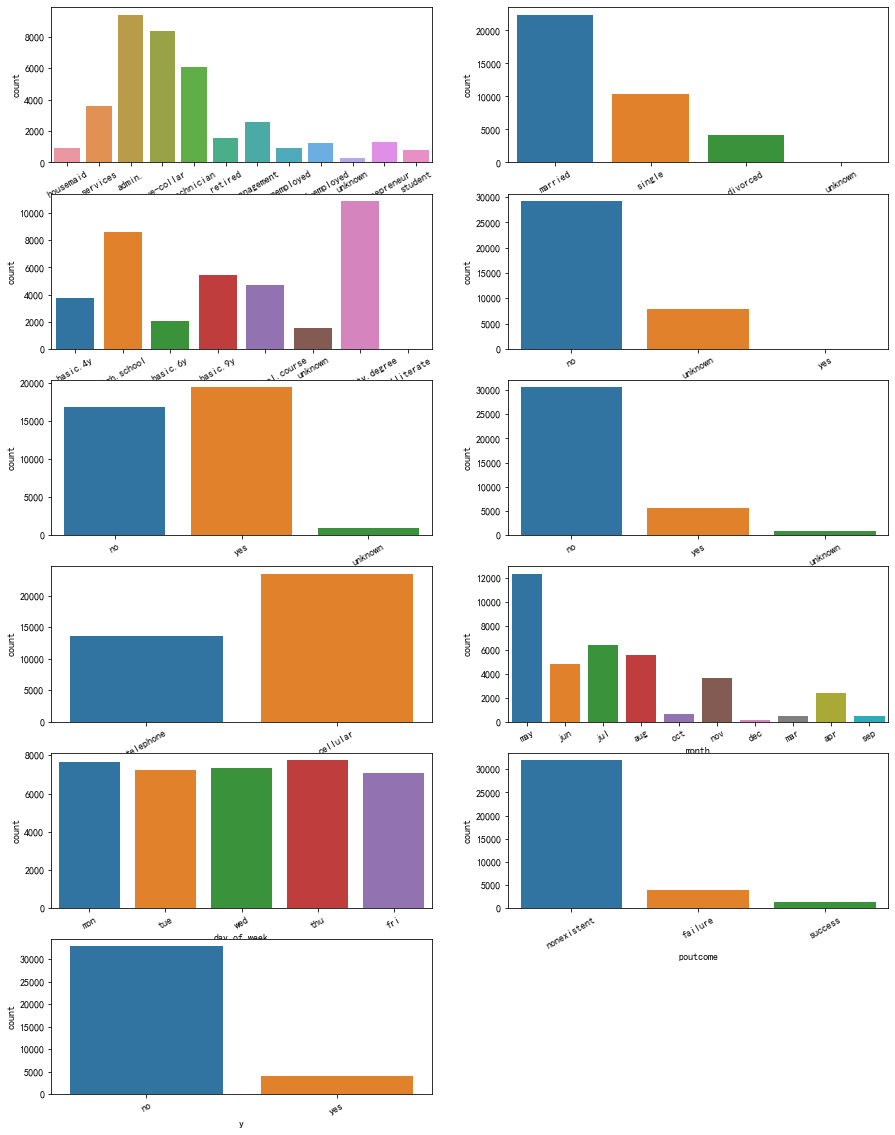

In [11]:
# 画柱状图
cat_plot_id = len(categorical_variables)+1
cat_nrows = int(cat_plot_id/2)

plt.figure(figsize=(15, 20))
for i in range(1, cat_plot_id):
    plt.subplot(cat_nrows, 2, i)
    # 用countplot()画出柱状图
    sns.countplot(x=categorical_variables[i-1], data=df)
    plt.xticks(rotation=30)

### 处理一下y

In [12]:
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
test["y"] = test["y"].apply(lambda x: 1 if x == "yes" else 0)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


### education: 之后把它变成一个ordinal categorical variable

In [14]:
df['education'].value_counts()

university.degree      10896
high.school             8588
basic.9y                5471
professional.course     4703
basic.4y                3747
basic.6y                2062
unknown                 1562
illiterate                17
Name: education, dtype: int64

In [15]:
# 先查看illiterate 的情况
df[df.education == 'illiterate']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5393,45,blue-collar,married,illiterate,unknown,no,yes,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6928,45,blue-collar,married,illiterate,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
12383,51,admin.,married,illiterate,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
14445,55,blue-collar,married,illiterate,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
14486,55,blue-collar,married,illiterate,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
16269,60,housemaid,married,illiterate,unknown,yes,no,cellular,jul,tue,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
17739,54,blue-collar,married,illiterate,unknown,yes,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
22402,45,blue-collar,married,illiterate,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
22642,44,blue-collar,married,illiterate,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
26680,34,self-employed,married,illiterate,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0


### 修改之前联系过，但是poutcome为unknown的情况

在这版本里，999表示之前没有被联系过

In [16]:
# 有多少顾客之前没有联系过？
df["是否联系过"] = df["pdays"].apply(lambda x: 0 if x == 999 else 1)
print(df["是否联系过"].value_counts())

# 在测试集里也构造该列
test["是否联系过"] = test["pdays"].apply(lambda x: 0 if x == 999 else 1)

0    35691
1     1355
Name: 是否联系过, dtype: int64


In [17]:
df['pdays'].value_counts()

999    35691
3        387
6        370
4        104
9         61
2         57
12        53
7         50
10        44
5         42
13        34
11        27
1         23
15        22
14        19
8         18
0         13
16         9
17         7
18         5
22         3
19         2
26         1
20         1
21         1
25         1
27         1
Name: pdays, dtype: int64

这一版本里，contact不存在unknown，说明之前的操作也是对的

In [18]:
# 被影响的变量
effect_variables = ["previous","poutcome","contact"]

# 分类统计
temp2 = df.groupby(by = ["是否联系过","poutcome","contact"], as_index = False)["age"].agg({"num":"count"})
# 占比统计
temp2["prop"] = temp2["num"]/temp2["num"].sum()

temp2.sort_values(by = "prop", ascending = False, inplace = True)
temp2

,是否联系过,poutcome,contact,num,prop
2,0,nonexistent,cellular,18811,0.507774
3,0,nonexistent,telephone,13206,0.356476
0,0,failure,cellular,3411,0.092075
6,1,success,cellular,1139,0.030746
1,0,failure,telephone,263,0.007099
4,1,failure,cellular,114,0.003077
7,1,success,telephone,92,0.002483
5,1,failure,telephone,10,0.000270


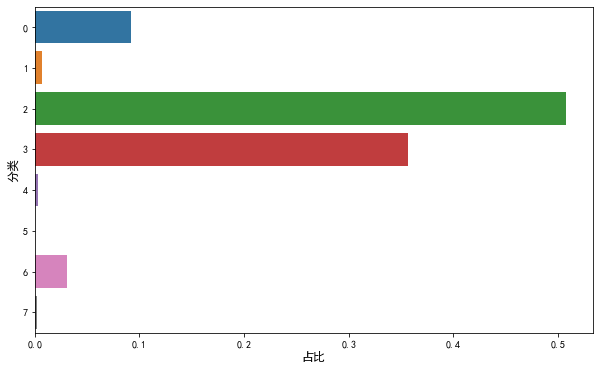

In [19]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = temp2.index, x = temp2["prop"], orient = "h")
plt.ylabel(ylabel = "分类",size = 12)
plt.xlabel(xlabel = "占比",size = 12)
plt.show()

没有之前联系过，poutcome却不知道的情况

In [20]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["poutcome"] == "unknown")].index
df.loc[edit_index]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,是否联系过


In [21]:
# # 寻找众数
# fill_val = df[df["是否联系过"] == 1]["poutcome"].mode()[0]
# fill_val

In [22]:
# # 填充
# df.loc[edit_index, "poutcome"] = fill_val
# df.loc[edit_index,"poutcome"]

In [23]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) &(test["poutcome"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["poutcome"].mode()[0]

# 填充
test.loc[edit_index, "poutcome"] = fill_val
test.loc[edit_index,"poutcome"]

Series([], Name: poutcome, dtype: object)

### 修改之前联系过，却unknown contact的情况

使用众数填充

In [24]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["contact"] == "unknown")].index
df.loc[edit_index,"contact"]

Series([], Name: contact, dtype: object)

In [25]:
# # 寻找众数
# fill_val = df[df["是否联系过"] == 1]["contact"].mode()[0]
# fill_val

In [26]:
# # 填充
# df.loc[edit_index, "contact"] = fill_val
# df.loc[edit_index, "contact"]

In [27]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) & (test["contact"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["contact"].mode()[0]

# 填充
test.loc[edit_index, "contact"] = fill_val
test.loc[edit_index, "contact"]

Series([], Name: contact, dtype: object)

## 连续型变量

In [28]:
from scipy import stats # 假设检验

In [29]:
numeric_variables = list(set(df.columns)- set(categorical_variables))
numeric_variables

['campaign',
 'pdays',
 '是否联系过',
 'cons.price.idx',
 'previous',
 'cons.conf.idx',
 'euribor3m',
 'age',
 'duration',
 'nr.employed',
 'emp.var.rate']

### duration：是否要舍弃这个变量

duration: last contact duration, in seconds (numeric). 

**Important note:**

this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [30]:
# 查看duration 为 0 的情况，只有3条数据
df[(df.duration ==0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,是否联系过
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0,0
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0,0
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0,0


In [31]:
### t-test: duration

### 查看两组变量(yes/no)的duration的平均值是否相同
stats.ttest_ind(df[df.y == 0]["duration"], df[df.y == 1]["duration"])

Ttest_indResult(statistic=-84.9769222298955, pvalue=0.0)

In [32]:
### 相关性检验
df.corr()["duration"]

age              -0.005264
duration          1.000000
campaign         -0.070489
pdays            -0.047612
previous          0.019986
emp.var.rate     -0.027823
cons.price.idx    0.004049
cons.conf.idx    -0.005189
euribor3m        -0.032889
nr.employed      -0.044708
y                 0.403897
是否联系过             0.047670
Name: duration, dtype: float64

**p值等于0，具有显著差异; 相关系数为0.39**

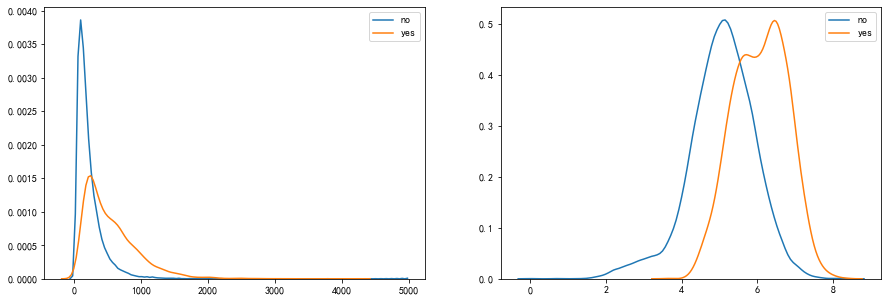

In [33]:
### 概率密度函数
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.kdeplot(df[df.y == 0]["duration"])
sns.kdeplot(df[df.y == 1]["duration"])
plt.legend(labels = ["no","yes"])

### 概率密度函数
plt.subplot(122)
sns.kdeplot(np.log(df[df.y == 0]["duration"]+1))
sns.kdeplot(np.log(df[df.y == 1]["duration"]+1))
plt.legend(labels = ["no","yes"])
plt.show()

In [34]:
### 取对数，查看两组变量(yes/no)的duration的平均值是否相同
stats.ttest_ind(np.log(df[df.y == 0]["duration"]+1), np.log(df[df.y == 1]["duration"]+1))

Ttest_indResult(statistic=-72.15993267968427, pvalue=0.0)

In [35]:
# 去掉duration
df.drop(columns = "duration", inplace = True)
test.drop(columns = "duration", inplace = True)

### emp.var.rate: employ_rate

In [36]:
# 重命名
df.rename({'emp.var.rate':"employ_rate"}, axis = 1, inplace = True)
test.rename({'emp.var.rate':"employ_rate"}, axis = 1, inplace = True)

In [37]:
# 查看数据分布
df['employ_rate'].value_counts()

 1.4    14597
-1.8     8297
 1.1     7003
-0.1     3289
-2.9     1497
-3.4      965
-1.7      686
-1.1      552
-3.0      151
-0.2        9
Name: employ_rate, dtype: int64

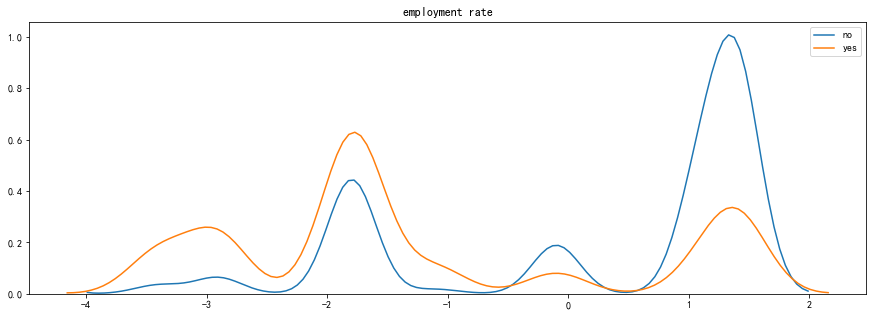

In [38]:
### 概率密度函数
plt.figure(figsize = (15,5))

#plt.subplot(121)
sns.kdeplot(df[df.y == 0]["employ_rate"])
sns.kdeplot(df[df.y == 1]["employ_rate"])
plt.legend(labels = ["no","yes"])
plt.title("employment rate")
plt.show()

### cons.price.idx: consumer price index

monthly indicator (numeric)     

In [39]:
## 重命名
df.rename({'cons.price.idx':"prc_index"}, axis = 1, inplace = True)
test.rename({'cons.price.idx':"prc_index"}, axis = 1, inplace = True)

In [40]:
# 每个月有几个不同的price index
df.groupby(by = 'month')['prc_index'].nunique()

month
apr    2
aug    3
dec    2
jul    3
jun    3
mar    2
may    3
nov    3
oct    3
sep    2
Name: prc_index, dtype: int64

确实也说明这个活动持续了2年左右

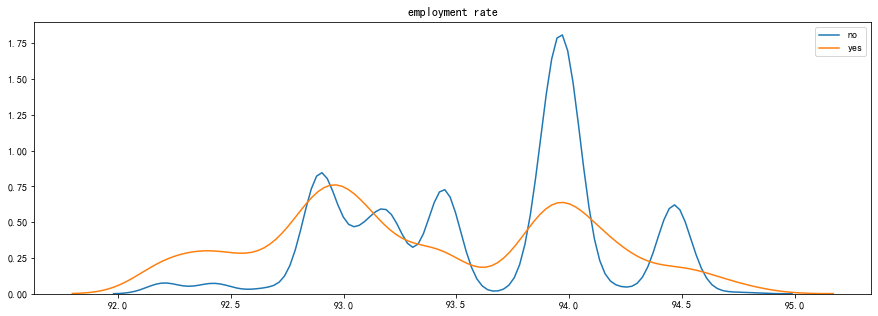

In [41]:
### 概率密度函数
plt.figure(figsize = (15,5))

#plt.subplot(121)
sns.kdeplot(df[df.y == 0]["prc_index"])
sns.kdeplot(df[df.y == 1]["prc_index"])
plt.legend(labels = ["no","yes"])
plt.title("employment rate")
plt.show()

### cons.conf.idx

In [42]:
# 重命名
df.rename({'cons.conf.idx':"confidence"}, axis = 1, inplace = True)
test.rename({'cons.conf.idx':"confidence"}, axis = 1, inplace = True)

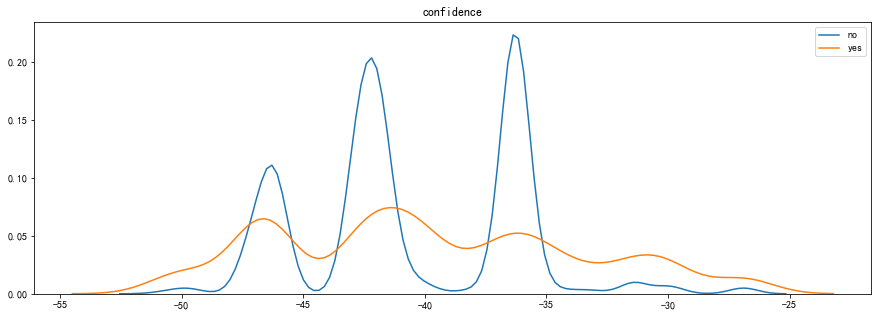

In [43]:
### 概率密度函数
plt.figure(figsize = (15,5))

#plt.subplot(121)
sns.kdeplot(df[df.y == 0]["confidence"])
sns.kdeplot(df[df.y == 1]["confidence"])
plt.legend(labels = ["no","yes"])
plt.title("confidence")
plt.show()

In [188]:
df['confidence'].nunique()

26

### euribor3m

In [44]:
# 重命名
df.rename({'euribor3m':"euro_interest"}, axis = 1, inplace = True)
test.rename({'euribor3m':"euro_interest"}, axis = 1, inplace = True)

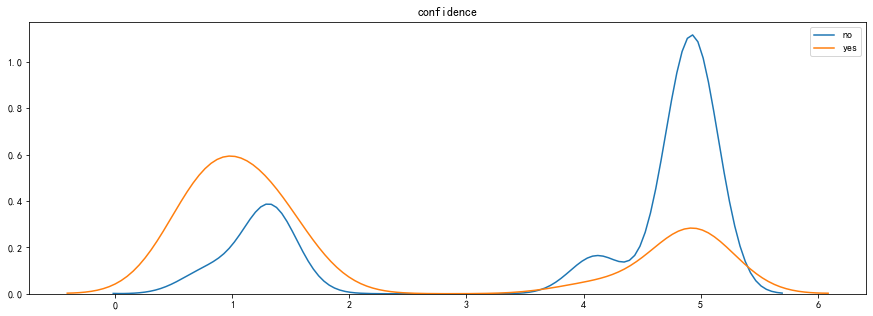

In [45]:
### 概率密度函数
plt.figure(figsize = (15,5))

#plt.subplot(121)
sns.kdeplot(df[df.y == 0]["euro_interest"])
sns.kdeplot(df[df.y == 1]["euro_interest"])
plt.legend(labels = ["no","yes"])
plt.title("confidence")
plt.show()

### nr.employed

In [46]:
# 重命名
df.rename({'nr.employed':"no_employ"}, axis = 1, inplace = True)
test.rename({'nr.employed':"no_employ"}, axis = 1, inplace = True)

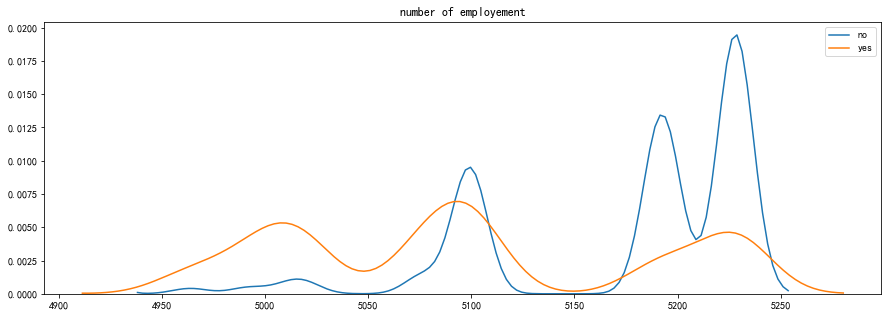

In [47]:
### 概率密度函数
plt.figure(figsize = (15,5))

#plt.subplot(121)
sns.kdeplot(df[df.y == 0]["no_employ"])
sns.kdeplot(df[df.y == 1]["no_employ"])
plt.legend(labels = ["no","yes"])
plt.title("number of employement")
plt.show()

# 特征工程

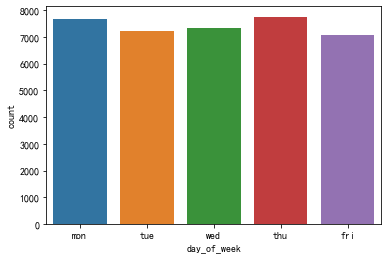

In [48]:
# 这份数据直接舍弃了day
# 画图
sns.countplot(df["day_of_week"])

## total_call: 一共打了多少电话

In [49]:
# total_call = previous + campaign
df["total_call"] = df["previous"] + df["campaign"]

# reshape
total_call = df["total_call"].values.reshape(-1,1)

In [50]:
# 在测试集上修改
test["total_call"] = test["previous"] + test["campaign"]

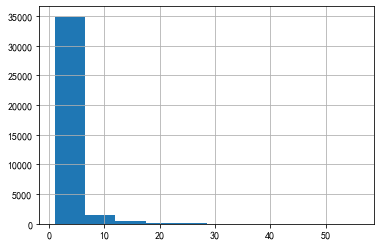

In [51]:
# 查看campaign分布
df['campaign'].hist()

## 去掉previous，因为有了“是否联系过”作为dummy

In [52]:
# # 去掉previous
# df.drop(columns = ["previous"], inplace = True)
# test.drop(columns = ["previous"], inplace = True)

## 去掉pdays

In [53]:
# 查看不为999情况的数据分布
df[df.pdays != 999]['pdays'].describe()

count    1355.000000
mean        6.032472
std         3.815595
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

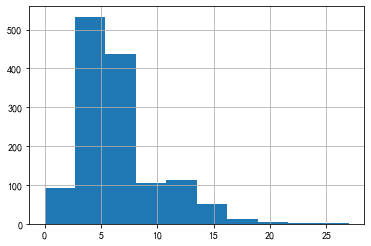

In [54]:
df[df.pdays != 999]['pdays'].hist()

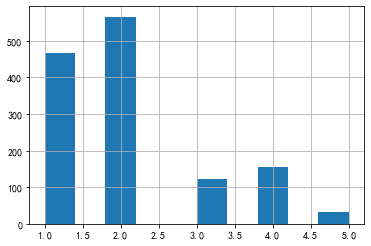

In [55]:
# 直接给pdays分箱，保留原来特征
bins = [0,3,7,10,15,30,999]
temp_col = pd.cut(df['pdays'],bins, labels = [1,2,3,4,5,6])
temp_col[temp_col != 6].hist()
plt.show()

In [56]:
# 修改训练集和测试集
df['pdays'] = pd.cut(df['pdays'],bins, labels = [1,2,3,4,5,6])
test['pdays'] = pd.cut(test['pdays'],bins, labels = [1,2,3,4,5,6])

In [57]:
# 去掉pdays
df.drop(columns = ["pdays"], inplace = True)
test.drop(columns = ["pdays"], inplace = True)

## 从过去模型里可以知道，去掉default

In [58]:
# # 去掉pdays
# df.drop(columns = ["default"], inplace = True)
# test.drop(columns = ["default"], inplace = True)

# # 从categorical_variables里去掉它
# categorical_variables.remove('default')

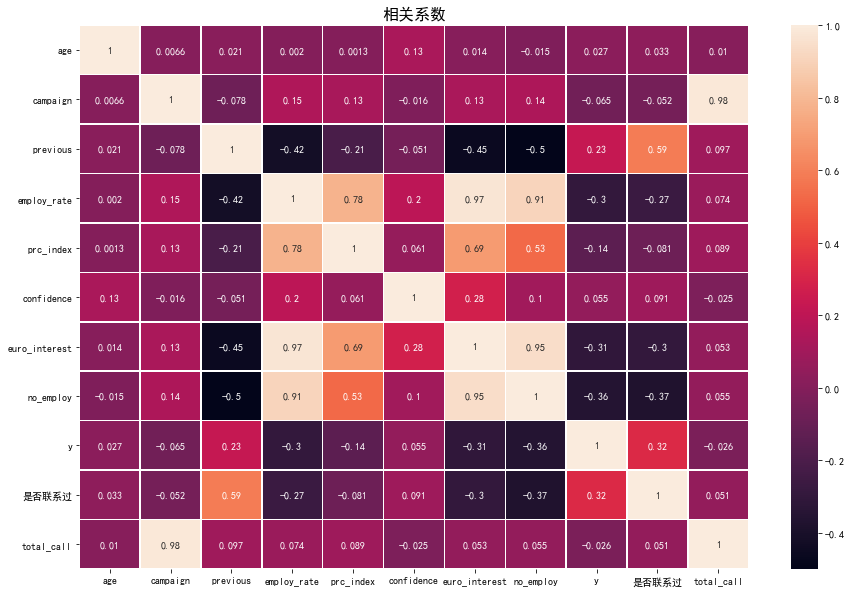

In [59]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=.5)
plt.title("相关系数",size = 16)
plt.show()

## 从第一次运行结果来看，employ_rate和eruo_interest占比很重

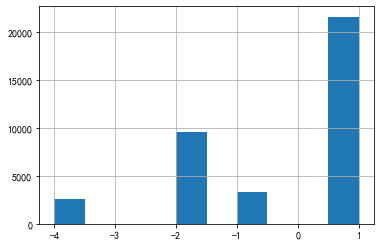

In [60]:
# 分箱结果
bins = [-4, -2, -1, 0, 2]
labels = [-4,-2,-1, 1]
pd.cut(df['employ_rate'], bins, labels = labels).hist()

In [61]:
# 给employ_rate 分箱
df['employ_rate'] = pd.cut(df['employ_rate'], bins, labels = labels)
test['employ_rate'] = pd.cut(test['employ_rate'], bins, labels = labels)

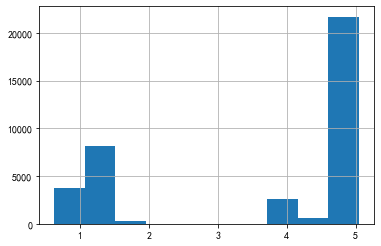

In [62]:
## eruo
df['euro_interest'].hist()

In [63]:
# uniuque值个数
df['euro_interest'].nunique()

312

In [64]:
# ## 分箱
# bins = [0,1,2,3,4,5,6,7]
# labels = [0,1,2,3,4,5,6]
# pd.cut(df['euro_interest'],bins,labels = labels).hist()

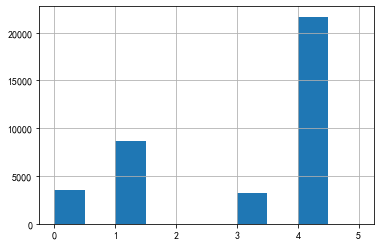

In [65]:
## 分箱
bins = [0,10,20,35,45,50,60,70]
labels = [0,1,2,3,4,5,6]
pd.cut(df['euro_interest']*10,bins,labels = labels).hist()

In [66]:
# euro分箱
df['euro_interest'] = pd.cut(df['euro_interest']*10,bins,labels = labels)
test['euro_interest'] = pd.cut(test['euro_interest']*10, bins, labels = labels)

## 从第二次运行及结果看：调整no_employ

In [67]:
df['no_employ'].value_counts()

5228.1    14597
5099.1     7707
5191.0     7003
5195.8     3289
5076.2     1497
5017.5      965
4991.6      686
5008.7      590
4963.6      552
5023.5      151
5176.3        9
Name: no_employ, dtype: int64

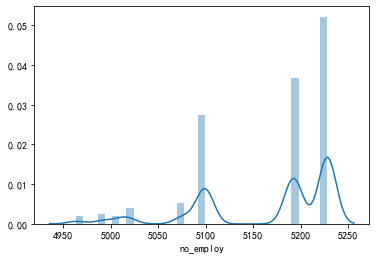

In [68]:
sns.distplot(df['no_employ'])

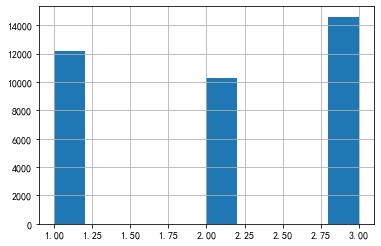

In [69]:
# 直接分三个箱
bins = [4000,5100,5200,5300]
labels = [1,2,3]
pd.cut(df['no_employ'], bins, labels = labels).hist()

In [70]:
df['no_employ'] = pd.cut(df['no_employ'], bins, labels = labels)
test['no_employ'] = pd.cut(test['no_employ'], bins, labels = labels)

## 数据转换

In [71]:
# 修改为数字
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
for var in categorical_variables:
    df[var] = df[var].astype('category').cat.codes
    test[var] = test[var].astype("category").cat.codes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,employ_rate,prc_index,confidence,euro_interest,no_employ,y,是否联系过,total_call
0,56,3,1,0,0,0,0,1,6,1,...,0,1,1,93.994,-36.4,4,2,0,0,1
1,57,7,1,3,1,0,0,1,6,1,...,0,1,1,93.994,-36.4,4,2,0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,0,1,1,93.994,-36.4,4,2,0,0,1
3,40,0,1,1,0,0,0,1,6,1,...,0,1,1,93.994,-36.4,4,2,0,0,1
4,56,7,1,3,0,0,2,1,6,1,...,0,1,1,93.994,-36.4,4,2,0,0,1


In [73]:
# 查看数据分布
for var in categorical_variables:
    print("【变量名%s:】"%var)
    print(df[var].value_counts(),"\n","-"*30)

【变量名job:】
0     9404
1     8368
9     6045
7     3572
4     2600
5     1550
2     1308
6     1262
3      950
10     903
8      793
11     291
Name: job, dtype: int64 
 ------------------------------
【变量名marital:】
1    22405
2    10408
0     4164
3       69
Name: marital, dtype: int64 
 ------------------------------
【变量名education:】
6    10896
3     8588
2     5471
5     4703
0     3747
1     2062
7     1562
4       17
Name: education, dtype: int64 
 ------------------------------
【变量名default:】
0    29252
1     7792
2        2
Name: default, dtype: int64 
 ------------------------------
【变量名housing:】
2    19392
0    16769
1      885
Name: housing, dtype: int64 
 ------------------------------
【变量名loan:】
0    30578
2     5583
1      885
Name: loan, dtype: int64 
 ------------------------------
【变量名contact:】
0    23475
1    13571
Name: contact, dtype: int64 
 ------------------------------
【变量名month:】
6    12387
3     6454
1     5538
4     4788
7     3653
0     2415
8      647
9      506


# RandomForest

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

seed = 12345

In [75]:
# 准备训练集
var_x = list(set(df.columns) - set("y")) # 自变量
train_x, train_y = df[var_x],df["y"]

# 准备测试集
test_x, test_y = test[var_x],test["y"]

## 初步建立模型

In [76]:
rf_1 = RandomForestClassifier(criterion = "gini",
                             n_estimators = 100,
                             max_features = "sqrt",
                             bootstrap = True,
                             oob_score = True,
                             class_weight = "balanced",
                             random_state = seed)
rf_1.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=12345,
                       verbose=0, warm_start=False)

In [77]:
# 制作data frame 并查看结果
features = pd.DataFrame({"feature": var_x, "score":rf_1.feature_importances_ })
features.sort_values(by = "score",inplace = True, ascending = False)
features

,feature,score
9,age,0.189967
4,job,0.087883
11,day_of_week,0.082867
13,education,0.081779
12,euro_interest,0.065714
16,no_employ,0.054981
3,total_call,0.052090
0,campaign,0.051736
6,employ_rate,0.046357
7,marital,0.042588


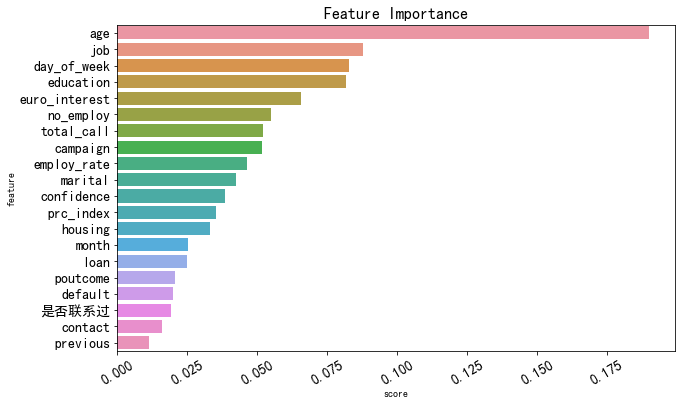

In [78]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = "feature", x = "score", data = features, orient = 'h' )
plt.title("Feature Importance", size = 16)
plt.xticks(rotation = 30, size = 14)
plt.yticks(size = 14)
plt.show()

In [79]:
test.iloc[[16,17]]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,employ_rate,prc_index,confidence,euro_interest,no_employ,y,是否联系过,total_call
16,44,0,0,6,0,0,0,0,3,4,...,0,1,1,93.918,-42.7,4,3,0,0,6
17,46,0,0,6,0,2,0,1,3,1,...,0,1,1,93.918,-42.7,4,3,0,0,4


In [80]:
test_x

,campaign,housing,previous,total_call,job,contact,employ_rate,marital,是否联系过,age,prc_index,day_of_week,euro_interest,education,poutcome,month,no_employ,default,confidence,loan
0,2,2,0,2,1,0,-2,1,0,30,92.893,0,1,2,1,6,1,0,-46.2,0
1,4,0,0,4,7,1,1,2,0,39,93.994,0,4,3,1,6,2,0,-36.4,0
2,1,2,0,1,7,1,1,1,0,25,94.465,4,4,3,1,4,3,0,-41.8,0
3,3,1,0,3,7,1,1,1,0,38,94.465,0,4,2,1,4,3,0,-41.8,1
4,1,2,0,1,0,0,-1,1,0,47,93.200,1,3,6,1,7,2,0,-42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,2,0,1,0,0,1,1,0,30,93.918,2,4,1,1,3,3,0,-42.7,2
4115,1,2,0,1,0,1,1,1,0,39,93.918,0,4,3,1,3,3,0,-42.7,0
4116,2,0,1,3,8,0,-2,2,0,27,92.893,1,1,3,0,6,1,0,-46.2,0
4117,1,0,0,1,0,0,1,1,0,58,93.444,0,4,3,1,1,3,0,-36.1,0


In [81]:
from sklearn.metrics import confusion_matrix

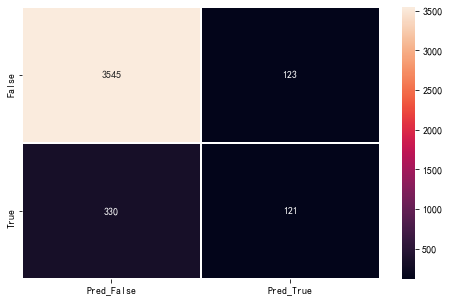

In [82]:
# 预测结果
rf_1_predict = rf_1.predict(test_x)

# confusion matrix
cm1 = confusion_matrix(test_y, rf_1_predict)

#画图
plt.figure(figsize = (8,5))
sns.heatmap(cm1,annot = True, fmt = '.5g', linewidths = 0.5, yticklabels = ["False","True"], xticklabels = ["Pred_False","Pred_True"])
plt.show()

In [83]:
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3668
           1       0.50      0.27      0.35       451

    accuracy                           0.89      4119
   macro avg       0.71      0.62      0.64      4119
weighted avg       0.87      0.89      0.88      4119



In [84]:
# roc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_true=test_y,
                                 y_score=rf_1_predict)
auc = auc(fpr, tpr)
auc

0.6173797111471659

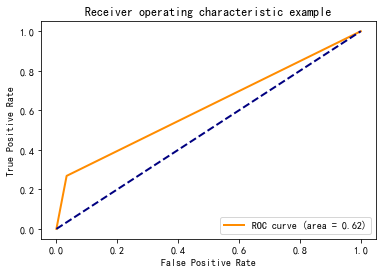

In [85]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 一些指标

In [86]:
from sklearn.metrics import accuracy_score # 准确率
from sklearn.metrics import precision_score # 精确率
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report # 分类报告
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [87]:
# 准确率
accuracy_score(test_y, rf_1_predict)

0.8900218499635834

In [88]:
# 精确率
precision_score(test_y, rf_1_predict)

0.4959016393442623

In [89]:
# 分类报告
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3668
           1       0.50      0.27      0.35       451

    accuracy                           0.89      4119
   macro avg       0.71      0.62      0.64      4119
weighted avg       0.87      0.89      0.88      4119



## 重采样

In [90]:
from sklearn.model_selection import train_test_split # 划分训练集

In [91]:
# 训练集中正负样本比例：
bin_count = np.bincount(df['y'])
print("正负样本：",bin_count)
print("正负样本比例：",bin_count[0]/ bin_count[1])

正负样本： [32859  4187]
正负样本比例： 7.847862431335085


In [92]:
def F1(precision, recall):

    '''
    7、综合评价指标（F-Measure）
    P和R指标有时候会出现的矛盾的情况，这样就需要综合考虑他们，最常见的方法就是F-Measure（又称为F-Score）。
    F-Measure是Precision和Recall加权调和平均：
    
    可知F1综合了P和R的结果，当F1较高时则能说明试验方法比较有效。
    '''
    return (2 * precision * recall)/(precision+recall)

### 验证集不重采样

In [93]:
# 首先划分出测试集和验证集
mydf = df.copy(deep=True)
X_train, X_valid, y_train, y_valid = train_test_split(mydf[var_x], 
                                                          mydf["y"], random_state=seed, test_size=0.25)

# 需要重复的部分
repeat_mask = y_train == 1
X_train_repeat = X_train[repeat_mask]
y_train_repeat = y_train[repeat_mask]

In [94]:
#多次重采样，并且使用随机森林，在验证集上查看结果
n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
predict_result = [] # 预测结果



# 循环
for i in n_resample:
    print("重采样中：n = %d" % (i+1))
    
    # 只重采样X_train, y_train
    X_train = X_train.append(X_train_repeat)
    y_train = y_train.append(y_train_repeat)


    # 随机森林
    print("拟合中...")
    rf_n = RandomForestClassifier(criterion="entropy",
                                  n_estimators=100,
                                  random_state=seed,
                                  #min_sample_split = 200,
                                  max_features="sqrt",
                                  bootstrap=True,
                                  oob_score=True,
                                  class_weight="balanced")
    rf_n.fit(X_train, y_train)

    # 预测结果
    print("预测中...")
    rf_n_predict = rf_n.predict(X_valid)
    predict_result.append(rf_n_predict)

    # 模型评估
    pre_score = precision_score(y_valid, rf_n_predict)
    acc_score = accuracy_score(y_valid, rf_n_predict)
    rec_score = recall_score(y_valid, rf_n_predict)
    f1_score = F1(pre_score, rec_score)

    accuracy_scores.append(acc_score)
    precision_scores.append(pre_score)
    recall_scores.append(rec_score)
    f1_scores.append(f1_score)
    print("precision:", pre_score)
    print("accuracy:", acc_score)
    print("recall:", rec_score)
    print("f1:", f1_score)

    print("-"*30)

重采样中：n = 1
拟合中...
预测中...
precision: 0.4730077120822622
accuracy: 0.8827467069747355
recall: 0.3524904214559387
f1: 0.4039517014270033
------------------------------
重采样中：n = 2
拟合中...
预测中...
precision: 0.4618138424821002
accuracy: 0.8803714100626214
recall: 0.3706896551724138
f1: 0.41126461211477155
------------------------------
重采样中：n = 3
拟合中...
预测中...
precision: 0.45714285714285713
accuracy: 0.8791837616065644
recall: 0.3831417624521073
f1: 0.4168837936425221
------------------------------
重采样中：n = 4
拟合中...
预测中...
precision: 0.4541284403669725
accuracy: 0.8786439213992658
recall: 0.3793103448275862
f1: 0.4133611691022965
------------------------------
重采样中：n = 5
拟合中...
预测中...
precision: 0.44745762711864406
accuracy: 0.8772403368602893
recall: 0.3793103448275862
f1: 0.4105754276827372
------------------------------
重采样中：n = 6
拟合中...
预测中...
precision: 0.45182724252491696
accuracy: 0.8778881451090477
recall: 0.39080459770114945
f1: 0.4191063174114022
------------------------------
重采样中：

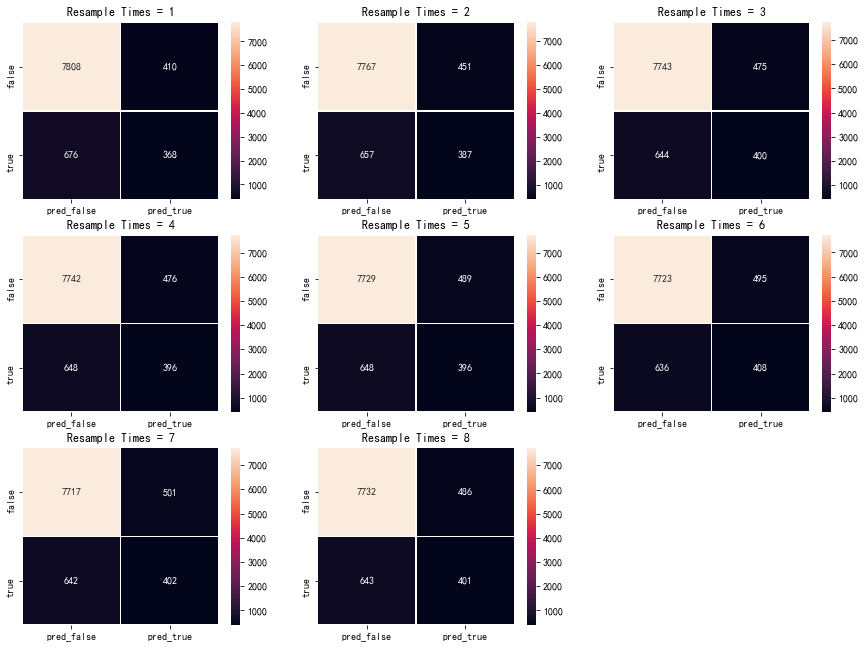

In [95]:
# 验证集混淆矩阵
plt.figure(figsize = (15,15))
for i in n_resample:
    plt.subplot(4,3,i+1)
    sns.heatmap(confusion_matrix(y_valid, predict_result[i]), linewidth = 0.5, annot = True, fmt = '.5g',
               yticklabels = ['false',"true"], xticklabels = ["pred_false",'pred_true'])
    plt.title("Resample Times = %d" %(i+1))
plt.show() 

In [96]:
# 重采样后的模型评估
model_eval_1 = pd.DataFrame({
    'resample_times': n_resample,
    "accuracy": accuracy_scores,
    "precision": precision_scores,
    "recall": recall_scores,
    "f1": f1_scores
})
model_eval_1 

,resample_times,accuracy,precision,recall,f1
0,0,0.882747,0.473008,0.352490,0.403952
1,1,0.880371,0.461814,0.370690,0.411265
2,2,0.879184,0.457143,0.383142,0.416884
3,3,0.878644,0.454128,0.379310,0.413361
4,4,0.877240,0.447458,0.379310,0.410575
5,5,0.877888,0.451827,0.390805,0.419106
6,6,0.876593,0.445183,0.385057,0.412943
7,7,0.878104,0.452086,0.384100,0.415329


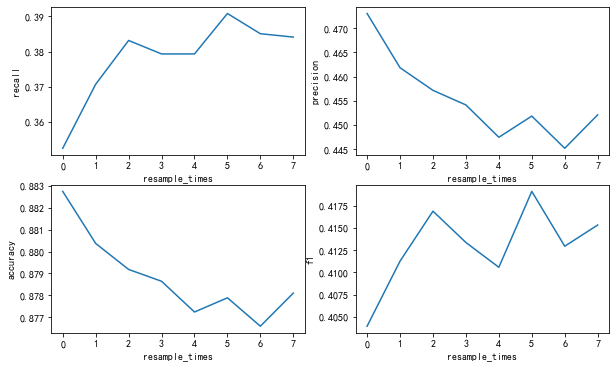

In [97]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.lineplot(x = "resample_times", y = "recall", data = model_eval_1)
plt.subplot(2,2,2)
sns.lineplot(x = "resample_times", y = "precision", data = model_eval_1)
#plt.legend(labels = ["recall","precision"])

plt.subplot(2,2,3)
sns.lineplot(x = "resample_times", y = "accuracy", data = model_eval_1)
plt.subplot(2,2,4)

sns.lineplot(x = "resample_times", y = "f1", data = model_eval_1)
plt.show()

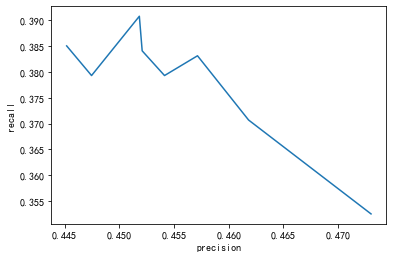

In [98]:
sns.lineplot(x = "precision", y = "recall", data = model_eval_1)

### 含验证集重采样

In [99]:
# 多次重采样，并且使用随机森林，在验证集上查看结果
n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
predict_result = [] # 预测结果
y_valid_sets = [] # 记录一下不同的验证集y


# 循环
for i in n_resample:
    print("重采样中：n = %d" % (i+1))
    mydf = mydf.append(df[df.y == 1])
    # 划出验证集
    X_train, X_valid, y_train, y_valid = train_test_split(mydf[var_x], 
                                                          mydf["y"], random_state=seed, test_size=0.25)
    y_valid_sets.append(y_valid)

    # 随机森林
    print("拟合中...")
    rf_n = RandomForestClassifier(criterion="entropy",
                                  n_estimators=100,
                                  random_state=seed,
                                  #min_sample_split = 200,
                                  max_features="sqrt",
                                  bootstrap=True,
                                  oob_score=True,
                                  class_weight="balanced")
    rf_n.fit(X_train, y_train)

    # 预测结果
    print("预测中...")
    rf_n_predict = rf_n.predict(X_valid)
    predict_result.append(rf_n_predict)

    # 模型评估
    pre_score = precision_score(y_valid, rf_n_predict)
    acc_score = accuracy_score(y_valid, rf_n_predict)
    rec_score = recall_score(y_valid, rf_n_predict)
    f1_score = F1(pre_score, rec_score)

    accuracy_scores.append(acc_score)
    precision_scores.append(pre_score)
    recall_scores.append(rec_score)
    f1_scores.append(f1_score)
    print("precision:", pre_score)
    print("accuracy:", acc_score)
    print("recall:", rec_score)
    print("f1:", f1_score)

    print("-"*30)

重采样中：n = 1
拟合中...
预测中...
precision: 0.7952314165497896
accuracy: 0.924143951886701
recall: 0.8317848410757946
f1: 0.8130975143403442
------------------------------
重采样中：n = 2
拟合中...
预测中...
precision: 0.8489598176118552
accuracy: 0.9412593571114046
recall: 0.9560333761232349
f1: 0.8993207547169811
------------------------------
重采样中：n = 3
拟合中...
预测中...
precision: 0.8883291351805206
accuracy: 0.9522657635865183
recall: 0.9860205032618826
f1: 0.9346289752650178
------------------------------
重采样中：n = 4
拟合中...
预测中...
precision: 0.8988115449915111
accuracy: 0.9536024983270132
recall: 0.994738819992484
f1: 0.9443453442739921
------------------------------
重采样中：n = 5
拟合中...
预测中...
precision: 0.9169664699956829
accuracy: 0.9601959161147903
recall: 1.0
f1: 0.9566849335635463
------------------------------
重采样中：n = 6
拟合中...
预测中...
precision: 0.9254402397901836
accuracy: 0.9615879552181187
recall: 1.0
f1: 0.9612765129402607
------------------------------
重采样中：n = 7
拟合中...
预测中...
precision: 0.9299

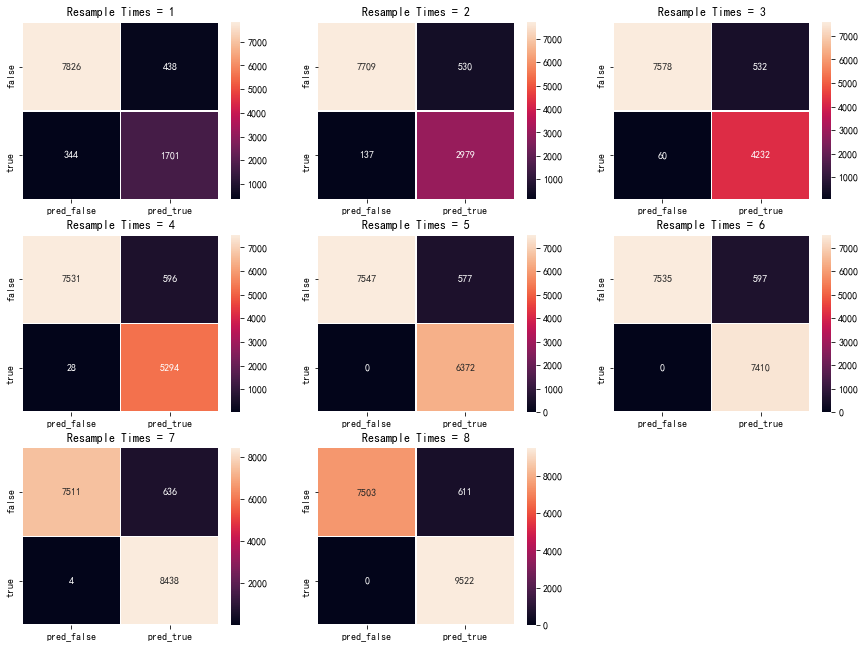

In [100]:
# 验证集混淆矩阵
plt.figure(figsize = (15,15))
for i in n_resample:
    plt.subplot(4,3,i+1)
    sns.heatmap(confusion_matrix(y_valid_sets[i], predict_result[i]), linewidth = 0.5, annot = True, fmt = '.5g',
               yticklabels = ['false',"true"], xticklabels = ["pred_false",'pred_true'])
    plt.title("Resample Times = %d" %(i+1))
plt.show() 

In [101]:
# 重采样后的模型评估
model_eval = pd.DataFrame({
    'resample_times': n_resample,
    "accuracy": accuracy_scores,
    "precision": precision_scores,
    "recall": recall_scores,
    "f1": f1_scores
})
model_eval

,resample_times,accuracy,precision,recall,f1
0,0,0.924144,0.795231,0.831785,0.813098
1,1,0.941259,0.848960,0.956033,0.899321
2,2,0.952266,0.888329,0.986021,0.934629
3,3,0.953602,0.898812,0.994739,0.944345
4,4,0.960196,0.916966,1.000000,0.956685
5,5,0.961588,0.925440,1.000000,0.961277
6,6,0.961420,0.929910,0.999526,0.963462
7,7,0.965355,0.939702,1.000000,0.968914


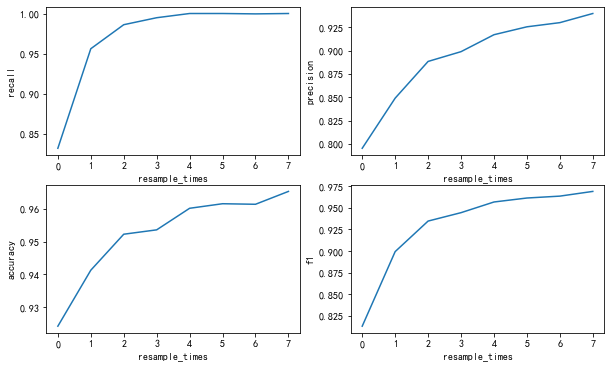

In [102]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.lineplot(x = "resample_times", y = "recall", data = model_eval)
plt.subplot(2,2,2)
sns.lineplot(x = "resample_times", y = "precision", data = model_eval)
#plt.legend(labels = ["recall","precision"])

plt.subplot(2,2,3)
sns.lineplot(x = "resample_times", y = "accuracy", data = model_eval)
plt.subplot(2,2,4)

sns.lineplot(x = "resample_times", y = "f1", data = model_eval)
plt.show()

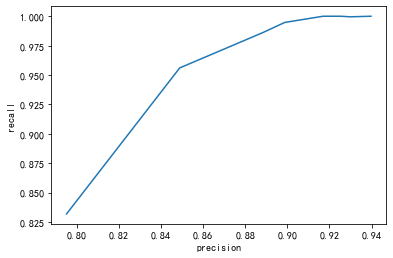

In [103]:
sns.lineplot(x = "precision", y = "recall", data = model_eval)
#sns.lineplot([0,0],[1,1])

## 调整超参

In [104]:
# test_set：把y=1的部分重复采样
i,n = 0, 3
mydf2 = df.copy(deep = True)
while i < n:
    mydf2 = mydf2.append(df[df.y==1])
    i+=1
mydf2.shape

(49607, 21)

In [105]:
# 正负样本数量
mydf2["y"].value_counts()

0    32859
1    16748
Name: y, dtype: int64

In [106]:
# train test split
X_train, X_valid, y_train, y_valid = train_test_split(mydf2[var_x],
                                                      mydf2["y"], random_state=seed, test_size=0.25)

### 调整n_estimator

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
# precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
# predict_result = [] # 预测结果
# for i in range(100,1000,100):
#     rfc = RandomForestClassifier(criterion="gini",
#                                   n_estimators=i,
#                                   random_state=seed,
#                                   oob_score=True,
#                                   class_weight="balanced")
    
#     # 拟合
#     rfc.fit(X_train, y_train)

#     # 预测结果
#     print("n_estimator = ",i,",预测中...")
#     rfc_predict = rfc.predict(X_valid)
#     predict_result.append(rfc_predict)
    
#     # 模型评估
#     pre_score = precision_score(y_valid, rfc_predict)
#     acc_score = accuracy_score(y_valid, rfc_predict)
#     rec_score = recall_score(y_valid, rfc_predict)
#     f1_score = F1(pre_score, rec_score)

#     accuracy_scores.append(acc_score)
#     precision_scores.append(pre_score)
#     recall_scores.append(rec_score)
#     f1_scores.append(f1_score)
#     print("precision:", pre_score)
#     print("accuracy:", acc_score)
#     print("recall:", rec_score)
#     print("f1:", f1_score)
#     print("-"*30)

In [109]:
# # 重采样后的模型评估
# model_n_estimator = pd.DataFrame({
#     'n_estimator': range(50,500,50),
#     "accuracy": accuracy_scores,
#     "precision": precision_scores,
#     "recall": recall_scores,
#     "f1": f1_scores
# })
# model_n_estimator 

In [110]:
# # 画图
# plt.figure(figsize = (10,6))
# plt.subplot(2,2,1)
# sns.lineplot(x = "n_estimator", y = "recall", data = model_n_estimator)
# plt.subplot(2,2,2)
# sns.lineplot(x = "n_estimator", y = "precision", data = model_n_estimator)
# #plt.legend(labels = ["recall","precision"])

# plt.subplot(2,2,3)
# sns.lineplot(x = "n_estimator", y = "accuracy", data = model_n_estimator)
# plt.subplot(2,2,4)

# sns.lineplot(x = "n_estimator", y = "f1", data = model_n_estimator)
# plt.show()

In [111]:
# # 找到f1最大的地方
# max_f1 = model_n_estimator["f1"].max()
# model_n_estimator[model_n_estimator.f1 == max_f1]

In [150]:
rfc = RandomForestClassifier(random_state=seed,criterion = "gini")

# 用网格搜索调整
param_grid = {'n_estimators':range(50,500,50)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "f1")
GS.fit(mydf2[var_x], mydf2["y"])
best_param = GS.best_params_
best_score = GS.best_score_
n_e = best_param['n_estimators']
print(best_param, best_score)  

{'n_estimators': 50} 0.5318466767611674


### 调整max_depth

In [151]:
# 建立n_estimators为n的随机森林
rfc = RandomForestClassifier(n_estimators=n_e, random_state=seed, criterion = "gini")

# 用网格搜索调整max_depth
param_grid = {'max_depth':range(1,25,5)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "recall")
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_d = best_param['max_depth']
print(best_param, best_score)  

{'max_depth': 21} 0.876926782273603


In [152]:
# 建立n_estimators为n的随机森林
rfc = RandomForestClassifier(n_estimators=n_e, random_state=seed, criterion = "gini")

# 用网格搜索调整max_depth
param_grid = {'max_depth':range(18,26,1)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "f1")
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_d = best_param['max_depth']
print(best_param, best_score)  

{'max_depth': 25} 0.8840951601905066


### 调整max_feature

参照：https://zhuanlan.zhihu.com/p/126288078

In [153]:
# 用网格搜索调整max_features
param_grid = {'max_features': range(4,19,3)}

rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=m_d,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'f1')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_f = best_param['max_features']
print(best_param, best_score)

{'max_features': 4} 0.8773425593586488


In [154]:
# 用网格搜索调整max_features
param_grid = {'max_features': range(4,9,1)}

rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=m_d,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'f1')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_f = best_param['max_features']
print(best_param, best_score)

{'max_features': 6} 0.8785916237947856


### class_weight

In [174]:
# 用网格搜索调整max_features
param_grid = {'class_weight': ["balanced",None,"balanced_subsample"]}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             max_features = m_f,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'f1')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
c_w = best_param['class_weight']
print(best_param, best_score)

{'class_weight': 'balanced_subsample'} 0.8872855647332581


### min_weight_fraction_leaf

In [175]:
# 用网格搜索调整max_features
param_grid = {'min_weight_fraction_leaf': np.arange(0, 10)/10000}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             max_features = m_f,
                             random_state=seed,
                            criterion = "gini",
                            class_weight = c_w)
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'f1')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_wf = best_param['min_weight_fraction_leaf']
print(best_param, best_score)

{'min_weight_fraction_leaf': 0.0} 0.8872855647332581


### min_sample_leaf

In [176]:
# 用网格搜索调整max_features
param_grid = {'min_samples_leaf': np.arange(0.1,50)/100}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             random_state=seed,
                             class_weight=c_w,
                             max_features = m_f,
                             min_weight_fraction_leaf = m_wf ,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'f1')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
msl = best_param ['min_samples_leaf']
print(best_param, best_score)

{'min_samples_leaf': 0.001} 0.6800751916546267


# 测试集

In [177]:
final_model = RandomForestClassifier(
    n_estimators=n_e,
    max_depth=m_d,
    random_state=seed,
    max_features=m_f,
    bootstrap=True,
    class_weight=c_w,
    criterion = "gini"
    ,
    min_samples_leaf = msl,
    min_samples_split = 2,
    min_weight_fraction_leaf = m_wf
)
# 训练模型
# final_model.fit(mydf2[var_x], mydf2["y"])
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=25, max_features=6, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=0.001,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=12345, verbose=0, warm_start=False)

In [178]:
# 预测结果
predict_result = final_model.predict(test_x)

# 模型评估
pre_score = precision_score(test_y,predict_result)
acc_score = accuracy_score(test_y,predict_result)
rec_score = recall_score(test_y,predict_result)
f1_score = F1(pre_score, rec_score)
print('precision:' ,pre_score,
     "\naccuracy:",acc_score,
     "\nrecall:", rec_score,
     "\nf1:",f1_score)

precision: 0.3740053050397878 
accuracy: 0.8443797038116048 
recall: 0.6252771618625277 
f1: 0.46804979253112033


## 画图对比

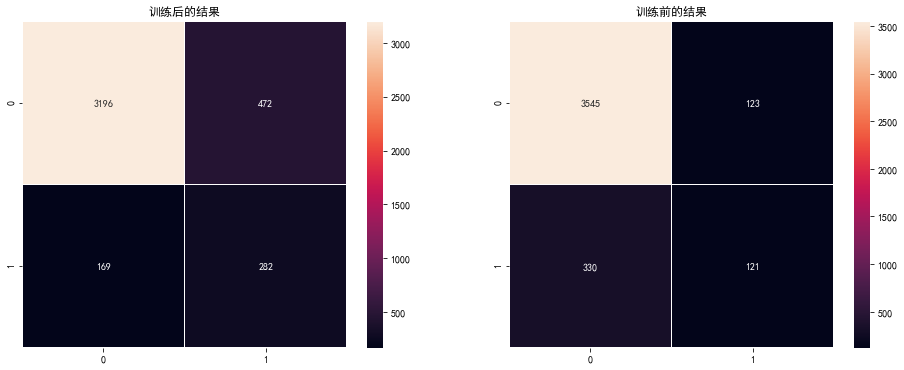

In [179]:
plt.figure(figsize = (16,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(test_y, predict_result), annot = True, fmt = '.5g',linewidth = 0.5)
plt.title("训练后的结果")

plt.subplot(122)
sns.heatmap(confusion_matrix(test_y, rf_1_predict), annot = True, fmt = '.5g',linewidth = 0.5)
plt.title("训练前的结果")
plt.show()

In [180]:
print(classification_report(test_y, predict_result))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3668
           1       0.37      0.63      0.47       451

    accuracy                           0.84      4119
   macro avg       0.66      0.75      0.69      4119
weighted avg       0.89      0.84      0.86      4119



In [181]:
# 对比原来的结果
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3668
           1       0.50      0.27      0.35       451

    accuracy                           0.89      4119
   macro avg       0.71      0.62      0.64      4119
weighted avg       0.87      0.89      0.88      4119



## ROC

In [182]:
# roc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(
    y_true=test_y,
    y_score=predict_result
)

In [183]:
auc = auc(fpr, tpr)
auc

0.7482983410185049

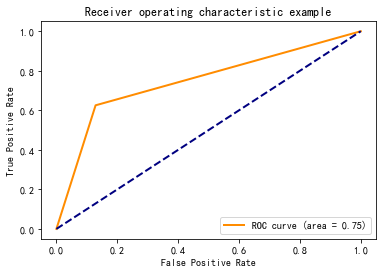

In [184]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## feature importance

In [185]:
# 制作data frame 并查看结果
features = pd.DataFrame({"feature": var_x, "score":final_model.feature_importances_ })
features.sort_values(by = "score",inplace = True, ascending = False)
features

,feature,score
12,euro_interest,0.191848
6,employ_rate,0.157897
16,no_employ,0.118826
18,confidence,0.096832
10,prc_index,0.059970
9,age,0.055935
8,是否联系过,0.053702
15,month,0.044780
14,poutcome,0.034887
11,day_of_week,0.034601


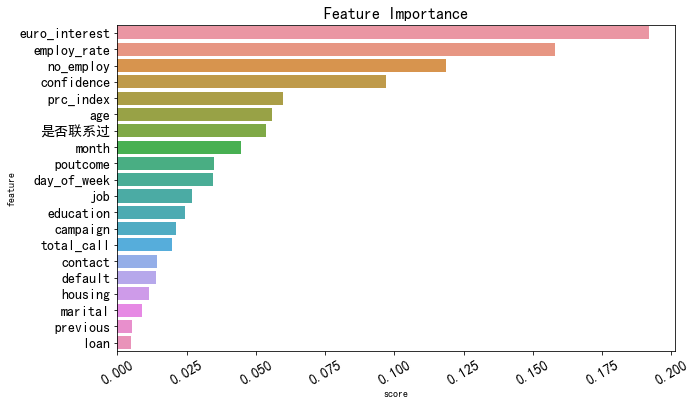

In [186]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = "feature", x = "score", data = features, orient = 'h' )
plt.title("Feature Importance", size = 16)
plt.xticks(rotation = 30, size = 14)
plt.yticks(size = 14)
plt.show()